In [2]:
#Importación de librería pandas
import pandas as pd

In [3]:
#Lectura del csv y creación de un dataframe para manipulación de datos
covid_o = pd.read_excel (r'http://saludcolima.gob.mx/coronavirus/datosabiertos/CENSO_DATOS_ABIERTOS_GENERAL_COVID_2020.xlsx')
covid_o.head(5)

,No de caso positivo por inicio de síntomas,No consecutivo por inicio de síntomas,Institución tratante,Unidad notificante,Toma de muestra en el ESTADO,Municipio de residencia,Edad,Sexo,Fecha de inicio de síntomas,Periodo mínimo de incubación (2 días),Periodo máximo de incubación (7 días),Fecha estimada de Alta Sanitaria,Procedencia,Fecha de llegada al Estado,Fecha de toma de muestra,Estatus día previo,Tipo de manejo,Estatus del paciente,Fecha de la defunción,Semana epidemiológica de defunciones positivas,Semana epidemiológica de resultados positivos,Fecha de resultado de laboratorio,Resultado de laboratorio,Pacientes que requirieron intubación,Pacientes que ingresaron a UCI,Diagnóstico clínico de Neumonía,Diagnóstico probable,Fiebre,Tos,Odinofagia,Disnea,Irritabilidad,Diarrea,Dolor torácico,Escalofríos,Cefalea,Mialgias,Artralgias,Ataque al estado general,Rinorrea,Polipnea,Vómito,Dolor abdminal,Conjuntivitis,Cianosis,Inicio súbito,Anosmia,Disgeusia,Diabetes,EPOC,Asma,Inmunosupresión,Hipertensión,VIH/SIDA,Otra condición,Enfermedad cardiaca,Obesidad,Insuficiencia renal crónica,Tabaquismo,Vacuna contra COVID19,Marca,Fecha de última aplicación,Ocupación
0,NaN,1,ISSSTE,HOSPITAL DR MIGUEL TREJO OCHOA,SI,"COL, Villa de Álvarez",70,F,2020-02-22,NaN,NaT,NaT,Italia,2020-03-03 00:00:00,2020-03-05,Seguimiento terminado,Ambulatorio,Seguimiento terminado,NaT,NaN,NaN,2020-03-06 00:00:00,Negativo,NO,NO,NO,ENFERMEDAD TIPO INFLUENZA (ETI),NO,SI,SI,NO,NO,NO,NO,NO,SI,NO,NO,NO,SI,NO,NO,NO,NO,NO,SE IGNORA,SE IGNORA,SE IGNORA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,NaN,NaN,ESTUDIANTES
1,NaN,2,SSyBS,C.S. MANZANILLO,SI,"COL, Manzanillo",64,M,2020-02-26,NaN,NaT,NaT,Italia,2020-02-12 00:00:00,2020-03-02,Seguimiento terminado,Ambulatorio,Seguimiento terminado,NaT,NaN,NaN,2020-03-02 00:00:00,Negativo,NO,NO,NO,ENFERMEDAD TIPO INFLUENZA (ETI),NO,SI,SI,NO,NO,NO,NO,NO,NO,NO,NO,SI,SI,SI,NO,NO,SI,SI,SE IGNORA,SE IGNORA,SE IGNORA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,NaN,NaN,OTROS
2,NaN,3,IMSS,HGSMF 4 TECOMAN,SI,"COL, Tecomán",52,M,2020-02-29,NaN,NaT,NaT,No aplica,No aplica,2020-03-02,Seguimiento terminado,Hospitalizado,Seguimiento terminado,NaT,NaN,NaN,2020-04-08 00:00:00,Negativo,NO,NO,NO,INFECCION RESPIRATORIA AGUDA GRAVE (IRAG),SI,SI,SI,SI,NO,NO,SI,SI,SI,SI,SI,SI,SI,NO,NO,SI,NO,NO,SI,SE IGNORA,SE IGNORA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,NaN,NaN,JUBILADO / PENSIONADO
3,NaN,4,IMSS,HGZ 10 MANZANILLO,SI,"COL, Manzanillo",30,M,2020-03-01,NaN,NaT,NaT,No aplica,No aplica,2020-03-02,Seguimiento terminado,Hospitalizado,Seguimiento terminado,NaT,NaN,NaN,2020-04-08 00:00:00,Negativo,NO,NO,NO,INFECCION RESPIRATORIA AGUDA GRAVE (IRAG),SI,SI,SI,SI,SI,NO,SI,NO,SI,NO,SI,SI,NO,SI,NO,SI,NO,NO,SI,SE IGNORA,SE IGNORA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,NaN,NaN,OTROS
4,NaN,5,IMSS,HGSMF 4 TECOMAN,SI,"COL, Villa de Álvarez",25,F,2020-03-04,NaN,NaT,NaT,Estados Unidos,2020-03-03 00:00:00,2020-03-09,Seguimiento terminado,Ambulatorio,Seguimiento terminado,NaT,NaN,NaN,2020-03-12 00:00:00,Negativo,NO,NO,NO,ENFERMEDAD TIPO INFLUENZA (ETI),SI,SI,SI,NO,NO,NO,NO,NO,SI,NO,NO,NO,SI,NO,NO,NO,NO,NO,NO,SE IGNORA,SE IGNORA,NO,NO,NO,NO,NO,NO,NO,NO,SI,NO,NO,NaN,NaN,NaN,MEDICOS


#2. Estructura del dataset

In [4]:
covid_o.shape # Cuántas filas y columnas

(57729, 63)

In [5]:
covid_o.columns #Nombres de las columnas

Index(['No de caso positivo por inicio de síntomas',
       'No consecutivo por inicio de síntomas', 'Institución tratante',
       'Unidad notificante', 'Toma de muestra en el ESTADO',
       'Municipio de residencia', 'Edad', 'Sexo',
       'Fecha de inicio de síntomas', 'Periodo mínimo de incubación (2 días)',
       'Periodo máximo de incubación (7 días)',
       'Fecha estimada de Alta Sanitaria', 'Procedencia',
       'Fecha de llegada al Estado', 'Fecha de toma de muestra',
       'Estatus día previo', 'Tipo de manejo', 'Estatus del paciente',
       'Fecha de la defunción',
       'Semana epidemiológica de defunciones positivas',
       'Semana epidemiológica de resultados positivos',
       'Fecha de resultado de laboratorio', 'Resultado de laboratorio',
       'Pacientes que requirieron intubación',
       'Pacientes que ingresaron a UCI', 'Diagnóstico clínico de Neumonía',
       'Diagnóstico probable', 'Fiebre', 'Tos', 'Odinofagia', 'Disnea',
       'Irritabilidad', 'Diarre

In [6]:
pd.set_option('display.max_rows', None) #Mostrar todas las columnas
covid_o.dtypes #Tipos de datos en cada columna

No de caso positivo por inicio de síntomas                object
No consecutivo por inicio de síntomas                      int64
Institución tratante                                      object
Unidad notificante                                        object
Toma de muestra en el ESTADO                              object
Municipio de residencia                                   object
Edad                                                       int64
Sexo                                                      object
Fecha de inicio de síntomas                       datetime64[ns]
Periodo mínimo de incubación (2 días)                     object
Periodo máximo de incubación (7 días)             datetime64[ns]
Fecha estimada de Alta Sanitaria                  datetime64[ns]
Procedencia                                               object
Fecha de llegada al Estado                                object
Fecha de toma de muestra                          datetime64[ns]
Estatus día previo       

#3. Preparación del dataset
a) Cambio de nombres de las columnas

In [7]:
#Creación de un diccionario para reemplazar los nombres de las columnas
diccionario_renombramiento = {
    "No de caso positivo por inicio de síntomas" : "no_positivo",
    "No consecutivo por inicio de síntomas" : "no_consecutivo",
    "Institución tratante" : "institucion",
    "Unidad notificante" : "unidad_noti",
    "Toma de muestra en el ESTADO" : "muestra_en_colima",
    "Municipio de residencia" : "municipio_res",
    "Edad" : "edad",
    "Sexo" : "sexo",
    "Fecha de inicio de síntomas" : "inicio_sintomas",
    "Periodo mínimo de incubación (2 días)" : "periodo_min2",
    "Periodo máximo de incubación (7 días)" : "periodo_max7",
    "Fecha estimada de Alta Sanitaria" : "fecha_alta",
    "Procedencia" : "procedencia",
    "Fecha de llegada al Estado" : "fecha_llegada",
    "Fecha de toma de muestra" : "fecha_muestra",
    "Estatus día previo" : "estatus_previo",
    "Tipo de manejo" : "tipo_manejo",
    "Estatus del paciente" : "estatus_paciente",
    "Fecha de la defunción" : "fecha_defuncion",
    "Semana epidemiológica de defunciones positivas" : "semana_def_positivas",
    "Semana epidemiológica de resultados positivos" : "semana_res_positivos",
    "Fecha de resultado de laboratorio" : "fecha_resultado",
    "Resultado de laboratorio" : "resultado_laboratorio",
    "Pacientes que requirieron intubación" : "pacientes_intubacion",
    "Pacientes que ingresaron a UCI" : "pacientes_uci",
    "Diagnóstico clínico de Neumonía" : "diagnostico_neumo",
    "Diagnóstico probable" : "diagnostico_probable",
    "Fiebre" : "fiebre", 
    "Tos" : "tos",
    "Odinofagia" : "odinofagia",
    "Disnea" : "disnea",
    "Irritabilidad": "irritabilidad",
    "Diarrea" : "diarrea",
    "Dolor torácico" : "dolor_toracico",
    "Escalofríos" : "escalofrios",
    "Cefalea" : "cefalea",
    "Mialgias": "mialgias",
    "Artralgias" : "artralgias",
    "Ataque al estado general" : "ataque_edo_gral",
    "Rinorrea" : "rinorrea",
    "Polipnea" : "polipnea",
    "Vómito" : "vomito",
    "Dolor abdminal" : "dolor_abdominal",
    "Conjuntivitis" : "conjuntivitis",
    "Cianosis" : "cianosis",
    "Inicio súbito" : "inicio_subito",
    "Anosmia" : "anosmia",
    "Disgeusia" : "disgeusia",
    "Diabetes" : "diabetes",
    "EPOC" : "epoc",
    "Asma" : "asma",
    "Inmunosupresión" : "inmunospresion",
    "Hipertensión" : "hipertension",
    "VIH/SIDA" : "VIH_SIDA",
    "Otra condición" : "otra",
    "Enfermedad cardiaca" : "enfermedad_cardiaca",
    "Obesidad" : "obesidad",
    "Insuficiencia renal crónica" : "insuficiencia_renal",
    "Tabaquismo" : "tabaquismo",
    "Vacuna contra COVID19" : "vacuna_covid",
    "Marca" : "marca_vacuna",
    "Fecha de última aplicación" : "fecha_ultima_aplica",
    "Ocupación" : "ocupacion"
}

In [8]:
covid_o = covid_o.rename(columns=diccionario_renombramiento) #Cambio de nombres de las columnas usando el diccionario creado en el paso previo
covid_o.head(5)

,no_positivo,no_consecutivo,institucion,unidad_noti,muestra_en_colima,municipio_res,edad,sexo,inicio_sintomas,periodo_min2,periodo_max7,fecha_alta,procedencia,fecha_llegada,fecha_muestra,estatus_previo,tipo_manejo,estatus_paciente,fecha_defuncion,semana_def_positivas,semana_res_positivos,fecha_resultado,resultado_laboratorio,pacientes_intubacion,pacientes_uci,diagnostico_neumo,diagnostico_probable,fiebre,tos,odinofagia,disnea,irritabilidad,diarrea,dolor_toracico,escalofrios,cefalea,mialgias,artralgias,ataque_edo_gral,rinorrea,polipnea,vomito,dolor_abdominal,conjuntivitis,cianosis,inicio_subito,anosmia,disgeusia,diabetes,epoc,asma,inmunospresion,hipertension,VIH_SIDA,otra,enfermedad_cardiaca,obesidad,insuficiencia_renal,tabaquismo,vacuna_covid,marca_vacuna,fecha_ultima_aplica,ocupacion
0,NaN,1,ISSSTE,HOSPITAL DR MIGUEL TREJO OCHOA,SI,"COL, Villa de Álvarez",70,F,2020-02-22,NaN,NaT,NaT,Italia,2020-03-03 00:00:00,2020-03-05,Seguimiento terminado,Ambulatorio,Seguimiento terminado,NaT,NaN,NaN,2020-03-06 00:00:00,Negativo,NO,NO,NO,ENFERMEDAD TIPO INFLUENZA (ETI),NO,SI,SI,NO,NO,NO,NO,NO,SI,NO,NO,NO,SI,NO,NO,NO,NO,NO,SE IGNORA,SE IGNORA,SE IGNORA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,NaN,NaN,ESTUDIANTES
1,NaN,2,SSyBS,C.S. MANZANILLO,SI,"COL, Manzanillo",64,M,2020-02-26,NaN,NaT,NaT,Italia,2020-02-12 00:00:00,2020-03-02,Seguimiento terminado,Ambulatorio,Seguimiento terminado,NaT,NaN,NaN,2020-03-02 00:00:00,Negativo,NO,NO,NO,ENFERMEDAD TIPO INFLUENZA (ETI),NO,SI,SI,NO,NO,NO,NO,NO,NO,NO,NO,SI,SI,SI,NO,NO,SI,SI,SE IGNORA,SE IGNORA,SE IGNORA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,NaN,NaN,OTROS
2,NaN,3,IMSS,HGSMF 4 TECOMAN,SI,"COL, Tecomán",52,M,2020-02-29,NaN,NaT,NaT,No aplica,No aplica,2020-03-02,Seguimiento terminado,Hospitalizado,Seguimiento terminado,NaT,NaN,NaN,2020-04-08 00:00:00,Negativo,NO,NO,NO,INFECCION RESPIRATORIA AGUDA GRAVE (IRAG),SI,SI,SI,SI,NO,NO,SI,SI,SI,SI,SI,SI,SI,NO,NO,SI,NO,NO,SI,SE IGNORA,SE IGNORA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,NaN,NaN,JUBILADO / PENSIONADO
3,NaN,4,IMSS,HGZ 10 MANZANILLO,SI,"COL, Manzanillo",30,M,2020-03-01,NaN,NaT,NaT,No aplica,No aplica,2020-03-02,Seguimiento terminado,Hospitalizado,Seguimiento terminado,NaT,NaN,NaN,2020-04-08 00:00:00,Negativo,NO,NO,NO,INFECCION RESPIRATORIA AGUDA GRAVE (IRAG),SI,SI,SI,SI,SI,NO,SI,NO,SI,NO,SI,SI,NO,SI,NO,SI,NO,NO,SI,SE IGNORA,SE IGNORA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,NaN,NaN,OTROS
4,NaN,5,IMSS,HGSMF 4 TECOMAN,SI,"COL, Villa de Álvarez",25,F,2020-03-04,NaN,NaT,NaT,Estados Unidos,2020-03-03 00:00:00,2020-03-09,Seguimiento terminado,Ambulatorio,Seguimiento terminado,NaT,NaN,NaN,2020-03-12 00:00:00,Negativo,NO,NO,NO,ENFERMEDAD TIPO INFLUENZA (ETI),SI,SI,SI,NO,NO,NO,NO,NO,SI,NO,NO,NO,SI,NO,NO,NO,NO,NO,NO,SE IGNORA,SE IGNORA,NO,NO,NO,NO,NO,NO,NO,NO,SI,NO,NO,NaN,NaN,NaN,MEDICOS


b) Convertir tipos de datos

In [9]:
covid_o["no_positivo"] = pd.to_numeric(covid_o["no_positivo"], errors = "coerce") #Convertir de object a float (como elegí no eliminar las filas con NaNs, no se pudo realizar el paso de la conversión de float a integer)
covid_o["no_positivo"].dtypes #Comprobar la conversión del tipo de dato

dtype('float64')

In [10]:
covid_o["periodo_min2"] = pd.to_datetime(covid_o["periodo_min2"], errors="coerce") #Convertir de object a M8[ns] (como elegí no eliminar las filas con NaNs, no se pudo realizar el paso de la conversión de object a M8[ns])
covid_o["periodo_min2"].dtypes #Comprobar la conversión del tipo de dato

dtype('<M8[ns]')

In [11]:
covid_o["fecha_llegada"] = pd.to_datetime(covid_o["fecha_llegada"], errors="coerce") #Convertir de object a M8[ns] (como elegí no eliminar las filas con NaNs, no se pudo realizar el paso de la conversión de object a M8[ns])
covid_o["fecha_llegada"].dtypes #Comprobar la conversión del tipo de dato

dtype('<M8[ns]')

In [12]:
covid_o["fecha_resultado"] = pd.to_datetime(covid_o["fecha_resultado"], errors="coerce") #Convertir de object a M8[ns] (como elegí no eliminar las filas con NaNs, no se pudo realizar el paso de la conversión de object a M8[ns])
covid_o["fecha_resultado"].dtypes #Comprobar la conversión del tipo de dato

dtype('<M8[ns]')

In [13]:
covid_o["fecha_ultima_aplica"] = pd.to_datetime(covid_o["fecha_ultima_aplica"], errors="coerce") #Convertir de object a M8[ns] (como elegí no eliminar las filas con NaNs, no se pudo realizar el paso de la conversión de object a M8[ns])
covid_o["fecha_ultima_aplica"].dtypes #Comprobar la conversión del tipo de dato

dtype('<M8[ns]')

In [14]:
covid_o.dtypes #Comprobar que se cambiaron los tipos de datos en el dataframe

no_positivo                     float64
no_consecutivo                    int64
institucion                      object
unidad_noti                      object
muestra_en_colima                object
municipio_res                    object
edad                              int64
sexo                             object
inicio_sintomas          datetime64[ns]
periodo_min2             datetime64[ns]
periodo_max7             datetime64[ns]
fecha_alta               datetime64[ns]
procedencia                      object
fecha_llegada            datetime64[ns]
fecha_muestra            datetime64[ns]
estatus_previo                   object
tipo_manejo                      object
estatus_paciente                 object
fecha_defuncion          datetime64[ns]
semana_def_positivas             object
semana_res_positivos             object
fecha_resultado          datetime64[ns]
resultado_laboratorio            object
pacientes_intubacion             object
pacientes_uci                    object


c) Manipulación de strings

In [15]:
covid_o[["estado", "municipio"]] = covid_o["municipio_res"].str.split(",", expand=True) #Crear dos columnas ("estado" y "municipio") a partir de la columna "municipio_res", identificando como separador la coma ","
covid_o = covid_o.drop(columns = ["municipio_res"]) #Eliminar columna "municipio_res"
covid_o.head(5) #Comprobar que se añadieron las dos columnas y se eliminó la columna de origen

,no_positivo,no_consecutivo,institucion,unidad_noti,muestra_en_colima,edad,sexo,inicio_sintomas,periodo_min2,periodo_max7,fecha_alta,procedencia,fecha_llegada,fecha_muestra,estatus_previo,tipo_manejo,estatus_paciente,fecha_defuncion,semana_def_positivas,semana_res_positivos,fecha_resultado,resultado_laboratorio,pacientes_intubacion,pacientes_uci,diagnostico_neumo,diagnostico_probable,fiebre,tos,odinofagia,disnea,irritabilidad,diarrea,dolor_toracico,escalofrios,cefalea,mialgias,artralgias,ataque_edo_gral,rinorrea,polipnea,vomito,dolor_abdominal,conjuntivitis,cianosis,inicio_subito,anosmia,disgeusia,diabetes,epoc,asma,inmunospresion,hipertension,VIH_SIDA,otra,enfermedad_cardiaca,obesidad,insuficiencia_renal,tabaquismo,vacuna_covid,marca_vacuna,fecha_ultima_aplica,ocupacion,estado,municipio
0,NaN,1,ISSSTE,HOSPITAL DR MIGUEL TREJO OCHOA,SI,70,F,2020-02-22,NaT,NaT,NaT,Italia,2020-03-03,2020-03-05,Seguimiento terminado,Ambulatorio,Seguimiento terminado,NaT,NaN,NaN,2020-03-06,Negativo,NO,NO,NO,ENFERMEDAD TIPO INFLUENZA (ETI),NO,SI,SI,NO,NO,NO,NO,NO,SI,NO,NO,NO,SI,NO,NO,NO,NO,NO,SE IGNORA,SE IGNORA,SE IGNORA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,NaN,NaT,ESTUDIANTES,COL,Villa de Álvarez
1,NaN,2,SSyBS,C.S. MANZANILLO,SI,64,M,2020-02-26,NaT,NaT,NaT,Italia,2020-02-12,2020-03-02,Seguimiento terminado,Ambulatorio,Seguimiento terminado,NaT,NaN,NaN,2020-03-02,Negativo,NO,NO,NO,ENFERMEDAD TIPO INFLUENZA (ETI),NO,SI,SI,NO,NO,NO,NO,NO,NO,NO,NO,SI,SI,SI,NO,NO,SI,SI,SE IGNORA,SE IGNORA,SE IGNORA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,NaN,NaT,OTROS,COL,Manzanillo
2,NaN,3,IMSS,HGSMF 4 TECOMAN,SI,52,M,2020-02-29,NaT,NaT,NaT,No aplica,NaT,2020-03-02,Seguimiento terminado,Hospitalizado,Seguimiento terminado,NaT,NaN,NaN,2020-04-08,Negativo,NO,NO,NO,INFECCION RESPIRATORIA AGUDA GRAVE (IRAG),SI,SI,SI,SI,NO,NO,SI,SI,SI,SI,SI,SI,SI,NO,NO,SI,NO,NO,SI,SE IGNORA,SE IGNORA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,NaN,NaT,JUBILADO / PENSIONADO,COL,Tecomán
3,NaN,4,IMSS,HGZ 10 MANZANILLO,SI,30,M,2020-03-01,NaT,NaT,NaT,No aplica,NaT,2020-03-02,Seguimiento terminado,Hospitalizado,Seguimiento terminado,NaT,NaN,NaN,2020-04-08,Negativo,NO,NO,NO,INFECCION RESPIRATORIA AGUDA GRAVE (IRAG),SI,SI,SI,SI,SI,NO,SI,NO,SI,NO,SI,SI,NO,SI,NO,SI,NO,NO,SI,SE IGNORA,SE IGNORA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,NaN,NaT,OTROS,COL,Manzanillo
4,NaN,5,IMSS,HGSMF 4 TECOMAN,SI,25,F,2020-03-04,NaT,NaT,NaT,Estados Unidos,2020-03-03,2020-03-09,Seguimiento terminado,Ambulatorio,Seguimiento terminado,NaT,NaN,NaN,2020-03-12,Negativo,NO,NO,NO,ENFERMEDAD TIPO INFLUENZA (ETI),SI,SI,SI,NO,NO,NO,NO,NO,SI,NO,NO,NO,SI,NO,NO,NO,NO,NO,NO,SE IGNORA,SE IGNORA,NO,NO,NO,NO,NO,NO,NO,NO,SI,NO,NO,NaN,NaN,NaT,MEDICOS,COL,Villa de Álvarez


In [16]:
#Estandarización de categorías por variable
  #estado
covid_o["estado"] = covid_o["estado"].str.replace("Mich", "MICH")
covid_o["estado"] = covid_o["estado"].str.replace("MEX", "EDOMEX")
covid_o["estado"] = covid_o["estado"].str.replace("HID", "HGO")
covid_o["estado"] = covid_o["estado"].str.replace("EDOEDOMEX", "EDOMEX")
  #municipio
covid_o["municipio"] = covid_o["municipio"].str.replace("Villa De Álvarez", "Villa de Álvarez")
covid_o["municipio"] = covid_o["municipio"].str.replace("ArmerÍa", "Armería")
  #ocupacion
covid_o["ocupacion"] = covid_o["ocupacion"].str.replace("EMPLEADOSS", "EMPLEADO")
covid_o["ocupacion"] = covid_o["ocupacion"].str.replace("ESTUDIANTESS", "ESTUDIANTE")
covid_o["ocupacion"] = covid_o["ocupacion"].str.replace("JUBILADO/PENSIONADO / PENSIONADO", "JUBILADO/PENSIONADO")
covid_o["ocupacion"] = covid_o["ocupacion"].str.replace("JUBILADO", "JUBILADO/PENSIONADO")

In [17]:
#Generar nuevo data frame eliminando las filas con valores no deseados
covid = covid_o[(covid_o["resultado_laboratorio"] == "SARS-COV-2")] #Filtrar filas con resultado de laboratorio positivo al SARS-COV-2
covid.head(10)

,no_positivo,no_consecutivo,institucion,unidad_noti,muestra_en_colima,edad,sexo,inicio_sintomas,periodo_min2,periodo_max7,fecha_alta,procedencia,fecha_llegada,fecha_muestra,estatus_previo,tipo_manejo,estatus_paciente,fecha_defuncion,semana_def_positivas,semana_res_positivos,fecha_resultado,resultado_laboratorio,pacientes_intubacion,pacientes_uci,diagnostico_neumo,diagnostico_probable,fiebre,tos,odinofagia,disnea,irritabilidad,diarrea,dolor_toracico,escalofrios,cefalea,mialgias,artralgias,ataque_edo_gral,rinorrea,polipnea,vomito,dolor_abdominal,conjuntivitis,cianosis,inicio_subito,anosmia,disgeusia,diabetes,epoc,asma,inmunospresion,hipertension,VIH_SIDA,otra,enfermedad_cardiaca,obesidad,insuficiencia_renal,tabaquismo,vacuna_covid,marca_vacuna,fecha_ultima_aplica,ocupacion,estado,municipio
13,1.0,14,IMSS,HGZMF 1 VILLA DE ALVAREZ,SI,25,F,2020-03-12,2020-03-10,2020-03-05,2020-03-28,Estados Unidos,2020-03-11,2020-03-14,Alta sanitaria,Ambulatorio,Alta sanitaria,NaT,NaN,Semana 12,2020-03-20,SARS-COV-2,NO,NO,NO,ENFERMEDAD TIPO INFLUENZA (ETI),SI,NO,NO,NO,NO,NO,NO,NO,SI,SI,SI,SI,SI,NO,NO,NO,NO,NO,SI,SE IGNORA,SE IGNORA,NO,NO,NO,NO,NO,NO,SI,NO,NO,NO,NO,NaN,NaN,NaT,EMPLEADOS,COL,Cuauhtémoc
18,2.0,19,PRIVADA,HOSPITAL DE ESPECIALIDADES PUERTA DE HIERRO CO...,SI,34,M,2020-03-15,2020-03-13,2020-03-08,2020-03-31,Alemania,2020-03-13,2020-03-17,Alta sanitaria,Ambulatorio,Alta sanitaria,NaT,NaN,Semana 12,2020-03-17,SARS-COV-2,NO,NO,NO,ENFERMEDAD TIPO INFLUENZA (ETI),SI,SI,NO,NO,NO,NO,NO,SI,SI,SI,SI,SI,SI,NO,NO,NO,NO,NO,SE IGNORA,SE IGNORA,SE IGNORA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,NaN,NaT,EMPLEADOS,COL,Colima
47,3.0,48,IMSS,HGZ 10 MANZANILLO,SI,33,F,2020-03-24,2020-03-22,2020-03-17,2020-04-09,No aplica,NaT,2020-03-30,Alta sanitaria,Hospitalizado,Alta sanitaria,NaT,NaN,Semana 15,2020-04-07,SARS-COV-2,NO,NO,NO,INFECCION RESPIRATORIA AGUDA GRAVE (IRAG),SI,NO,NO,SI,NO,NO,NO,NO,SI,SI,SI,NO,NO,NO,NO,NO,NO,NO,NO,SE IGNORA,SE IGNORA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,NaN,NaT,OTROS,COL,Manzanillo
51,4.0,52,PRIVADA,C.S. COLIMA,SI,25,M,2020-03-25,2020-03-23,2020-03-18,2020-04-10,Dubai/Brasil,2020-03-22,2020-03-30,Alta sanitaria,Hospitalizado,Alta sanitaria,NaT,NaN,Semana 14,2020-03-31,SARS-COV-2,NO,NO,SI,INFECCION RESPIRATORIA AGUDA GRAVE (IRAG),SI,SI,SI,SI,NO,NO,NO,NO,NO,SI,NO,NO,NO,SI,NO,NO,NO,NO,NO,SE IGNORA,SE IGNORA,NO,NO,NO,NO,SI,NO,NO,NO,NO,NO,NO,NaN,NaN,NaT,OTROS,COL,Colima
70,5.0,71,SSyBS,C.S. COLIMA,SI,76,M,2020-03-28,2020-03-26,2020-03-21,2020-04-13,Ecuador,2020-03-26,2020-04-02,Alta sanitaria,Ambulatorio,Alta sanitaria,NaT,NaN,Semana 15,2020-04-06,SARS-COV-2,NO,NO,NO,ENFERMEDAD TIPO INFLUENZA (ETI),SI,SI,SI,NO,NO,NO,SI,SI,SI,NO,NO,NO,SI,NO,NO,NO,NO,NO,NO,SE IGNORA,SE IGNORA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,NaN,NaT,COMERCIANTES DE MERCADOS FIJOS O AMBULANTES,COL,Villa de Álvarez
71,6.0,72,SSyBS,C.S. SOLIDARIDAD,SI,29,F,2020-03-28,2020-03-26,2020-03-21,2020-04-13,Estados Unidos,2020-03-26,2020-04-02,Alta sanitaria,Ambulatorio,Alta sanitaria,NaT,NaN,Semana 14,2020-04-02,SARS-COV-2,NO,NO,NO,ENFERMEDAD TIPO INFLUENZA (ETI),SI,SI,SI,NO,NO,SI,SI,NO,SI,NO,NO,NO,NO,NO,NO,NO,NO,NO,SE IGNORA,SE IGNORA,SE IGNORA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,NaN,NaT,EMPLEADOS,COL,Villa de Álvarez
73,7.0,74,IMSS,HGZ 10 MANZANILLO,SI,19,M,2020-03-29,2020-03-27,2020-03-22,2020-04-14,No aplica,NaT,2020-04-01,Alta sanitaria,Hospitalizado,Alta sanitaria,NaT,NaN,Semana 15,2020-04-07,SARS-COV-2,NO,NO,NO,INFECCION RESPIRATORIA AGUDA GRAVE (IRAG),SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,NO,SI,NO,SI,SI,NO,SI,SE IGNORA,SE IGNORA,SI,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,NaN,NaT,CHOFERES,COL,Manzanillo
102,8.0,103,SEMAR,HGZ 10 MANZANILLO,SI,67,M,2020-04-06,2020-04-04,2020-03-30,2020-04-22,No aplica,NaT,2020-04-13,Defunción,Hospitalizado,Defunción,2020-04-13,Semana 16,Semana 16,2020-04-17,SARS-COV-2,NO,NO,SI,INFECCION RESPIRATORIA AGUDA GRAVE (IRAG),SI,SI,SI,SI,NO,NO,SI,NO,NO,SI,SI,SI,NO,SI,NO,NO,NO,NO,NO,SE IGNORA,SE IGNORA,NO,NO,NO,NO,SI,NO,NO,NO,NO,NO,SI,NaN,NaN,NaT,OTROS,COL,

d) Limpieza de NaNs

In [18]:
#Búsqueda de NaNs
print(covid.isna().sum(axis=1)) #Por fila

13       5
18       5
47       6
51       5
70       5
71       5
73       6
102      4
107      6
123      4
126      6
127      6
129      4
130      6
153      6
156      6
161      6
162      4
166      6
167      6
168      6
172      4
174      6
188      6
192      6
201      6
204      6
207      6
214      4
229      4
230      6
231      4
237      6
242      6
245      6
247      4
250      6
251      6
252      6
257      6
259      6
263      6
266      6
269      4
277      6
288      6
290      6
302      6
306      6
307      6
312      6
315      6
317      5
319      6
320      6
323      6
325      6
327      4
329      6
335      6
339      4
342      6
346      6
348      6
349      6
354      6
357      6
359      6
362      6
365      4
366      4
369      7
370      6
372      4
374      6
375      6
377      4
385      6
386      6
387      4
388      6
389      4
390      6
392      6
394      4
396      6
401      6
414      6
416      6
420      6
422      4

In [19]:
print(covid.isna().sum(axis=0)) #Por columna

no_positivo                700
no_consecutivo               0
institucion                  0
unidad_noti                  0
muestra_en_colima            0
edad                         0
sexo                         0
inicio_sintomas              0
periodo_min2                 1
periodo_max7                 0
fecha_alta                   0
procedencia                  0
fecha_llegada            27145
fecha_muestra                0
estatus_previo             324
tipo_manejo                  0
estatus_paciente             0
fecha_defuncion          25328
semana_def_positivas     25336
semana_res_positivos         0
fecha_resultado              0
resultado_laboratorio        0
pacientes_intubacion         0
pacientes_uci                0
diagnostico_neumo            0
diagnostico_probable         0
fiebre                       0
tos                          0
odinofagia                   0
disnea                       0
irritabilidad                0
diarrea                      0
dolor_to

In [20]:
#Limpieza de NaNs
covid = covid.dropna(how="all") #Eliminar todas las filas donde todos los valores son NaNs y guardar los cambios en un nuevo dataframe
covid = covid.drop(columns = ["periodo_min2", "periodo_max7", "fecha_alta", "fecha_llegada", "fecha_defuncion", "semana_def_positivas", "semana_res_positivos"]) #Eliminar columnas con más de 20,000 NaNs y que no proporcionen información al análisis

In [21]:
#Reemplazo de NaNs
  #Reemplazar los valores en las columnas indicadas
covid["no_positivo"] = covid["no_positivo"].fillna(0)
covid["estatus_previo"] = covid["estatus_previo"].fillna("No disponible")
covid["vacuna_covid"] = covid["vacuna_covid"].fillna("No disponible")
covid["marca_vacuna"] = covid["marca_vacuna"].fillna("No disponible")
covid["ocupacion"] = covid["ocupacion"].fillna("No disponible")
covid.head(10)

,no_positivo,no_consecutivo,institucion,unidad_noti,muestra_en_colima,edad,sexo,inicio_sintomas,procedencia,fecha_muestra,estatus_previo,tipo_manejo,estatus_paciente,fecha_resultado,resultado_laboratorio,pacientes_intubacion,pacientes_uci,diagnostico_neumo,diagnostico_probable,fiebre,tos,odinofagia,disnea,irritabilidad,diarrea,dolor_toracico,escalofrios,cefalea,mialgias,artralgias,ataque_edo_gral,rinorrea,polipnea,vomito,dolor_abdominal,conjuntivitis,cianosis,inicio_subito,anosmia,disgeusia,diabetes,epoc,asma,inmunospresion,hipertension,VIH_SIDA,otra,enfermedad_cardiaca,obesidad,insuficiencia_renal,tabaquismo,vacuna_covid,marca_vacuna,fecha_ultima_aplica,ocupacion,estado,municipio
13,1.0,14,IMSS,HGZMF 1 VILLA DE ALVAREZ,SI,25,F,2020-03-12,Estados Unidos,2020-03-14,Alta sanitaria,Ambulatorio,Alta sanitaria,2020-03-20,SARS-COV-2,NO,NO,NO,ENFERMEDAD TIPO INFLUENZA (ETI),SI,NO,NO,NO,NO,NO,NO,NO,SI,SI,SI,SI,SI,NO,NO,NO,NO,NO,SI,SE IGNORA,SE IGNORA,NO,NO,NO,NO,NO,NO,SI,NO,NO,NO,NO,No disponible,No disponible,NaT,EMPLEADOS,COL,Cuauhtémoc
18,2.0,19,PRIVADA,HOSPITAL DE ESPECIALIDADES PUERTA DE HIERRO CO...,SI,34,M,2020-03-15,Alemania,2020-03-17,Alta sanitaria,Ambulatorio,Alta sanitaria,2020-03-17,SARS-COV-2,NO,NO,NO,ENFERMEDAD TIPO INFLUENZA (ETI),SI,SI,NO,NO,NO,NO,NO,SI,SI,SI,SI,SI,SI,NO,NO,NO,NO,NO,SE IGNORA,SE IGNORA,SE IGNORA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,No disponible,No disponible,NaT,EMPLEADOS,COL,Colima
47,3.0,48,IMSS,HGZ 10 MANZANILLO,SI,33,F,2020-03-24,No aplica,2020-03-30,Alta sanitaria,Hospitalizado,Alta sanitaria,2020-04-07,SARS-COV-2,NO,NO,NO,INFECCION RESPIRATORIA AGUDA GRAVE (IRAG),SI,NO,NO,SI,NO,NO,NO,NO,SI,SI,SI,NO,NO,NO,NO,NO,NO,NO,NO,SE IGNORA,SE IGNORA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,No disponible,No disponible,NaT,OTROS,COL,Manzanillo
51,4.0,52,PRIVADA,C.S. COLIMA,SI,25,M,2020-03-25,Dubai/Brasil,2020-03-30,Alta sanitaria,Hospitalizado,Alta sanitaria,2020-03-31,SARS-COV-2,NO,NO,SI,INFECCION RESPIRATORIA AGUDA GRAVE (IRAG),SI,SI,SI,SI,NO,NO,NO,NO,NO,SI,NO,NO,NO,SI,NO,NO,NO,NO,NO,SE IGNORA,SE IGNORA,NO,NO,NO,NO,SI,NO,NO,NO,NO,NO,NO,No disponible,No disponible,NaT,OTROS,COL,Colima
70,5.0,71,SSyBS,C.S. COLIMA,SI,76,M,2020-03-28,Ecuador,2020-04-02,Alta sanitaria,Ambulatorio,Alta sanitaria,2020-04-06,SARS-COV-2,NO,NO,NO,ENFERMEDAD TIPO INFLUENZA (ETI),SI,SI,SI,NO,NO,NO,SI,SI,SI,NO,NO,NO,SI,NO,NO,NO,NO,NO,NO,SE IGNORA,SE IGNORA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,No disponible,No disponible,NaT,COMERCIANTES DE MERCADOS FIJOS O AMBULANTES,COL,Villa de Álvarez
71,6.0,72,SSyBS,C.S. SOLIDARIDAD,SI,29,F,2020-03-28,Estados Unidos,2020-04-02,Alta sanitaria,Ambulatorio,Alta sanitaria,2020-04-02,SARS-COV-2,NO,NO,NO,ENFERMEDAD TIPO INFLUENZA (ETI),SI,SI,SI,NO,NO,SI,SI,NO,SI,NO,NO,NO,NO,NO,NO,NO,NO,NO,SE IGNORA,SE IGNORA,SE IGNORA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,No disponible,No disponible,NaT,EMPLEADOS,COL,Villa de Álvarez
73,7.0,74,IMSS,HGZ 10 MANZANILLO,SI,19,M,2020-03-29,No aplica,2020-04-01,Alta sanitaria,Hospitalizado,Alta sanitaria,2020-04-07,SARS-COV-2,NO,NO,NO,INFECCION RESPIRATORIA AGUDA GRAVE (IRAG),SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,NO,SI,NO,SI,SI,NO,SI,SE IGNORA,SE IGNORA,SI,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,No disponible,No disponible,NaT,CHOFERES,COL,Manzanillo
102,8.0,103,SEMAR,HGZ 10 MANZANILLO,SI,67,M,2020-04-06,No aplica,2020-04-13,Defunción,Hospitalizado,Defunción,2020-04-17,SARS-COV-2,NO,NO,SI,INFECCION RESPIRATORIA AGUDA GRAVE (IRAG),SI,SI,SI,SI,NO,NO,SI,NO,NO,SI,SI,SI,NO,SI,NO,NO,NO,NO,NO,SE IGNORA,SE IGNORA,NO,NO,NO,NO,SI,NO,NO,NO,NO,NO,SI,No disponible,No disponible,NaT,OTROS,COL,Manzanillo
107,9.0,108,SSyBS,OFICINAS JURISDICCIONALES,"NO, Campeche",43,M,2020-04-07,No aplica,2020-04-11,Alta sanitaria,Ambulatorio,Alta sanitaria,2020-04-29,SARS-COV-2,NO,NO,NO,ENFERMEDAD TIPO INFLUENZA (ETI),SI,SI,NO,NO,NO,NO,NO,SI,SI,SI,SI,SI,SI,NO,NO,NO,NO,NO,SI,SE IGNORA,SE IGNORA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,No disponible,No disponible,NaT,OTROS PROFESIONISTAS,COL,Manzanillo
123,10.0,124,SSyBS,HOSPITAL GENERAL DE MANZANIL

In [22]:
covid.shape # Cuántas filas y columnas quedaron después de los procesos de procesamiento

(27151, 57)

#4. Análisis de datos

a) Exploración de datos

In [23]:
  #Gráficos de dispersión
import seaborn as sns #Importar librería seaborn
import matplotlib.pyplot as plt #Importar librería matplotlib

In [24]:
#Análisis de la variable "resultado_laboratorio"
  #Tabla de frecuencias
t_laboratorio = covid_o["resultado_laboratorio"].value_counts() #Genera tabla de frecuencia a partir del dataframe original (que contiente tanto positivos como negativos y pendientes)
t_laboratorio

Negativo      30552
SARS-COV-2    27151
Pendiente        26
Name: resultado_laboratorio, dtype: int64

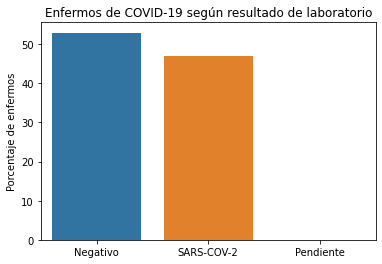

In [25]:
  #Gráfica de barras
p_laboratorio = t_laboratorio*100/t_laboratorio.sum() #Convertir la tabla de frecuencias a porcentaje
ax=sns.barplot(x=p_laboratorio.index, y=p_laboratorio) #Generar una gráfica de barras a partir de la tabla de frecuencias relativas
ax.set_title("Enfermos de COVID-19 según resultado de laboratorio") #Establecer título de la gráfica 
ax.set(ylabel="Porcentaje de enfermos"); #Establecer título del eje vertical

In [26]:
#Análisis de la variable "edad" para todos los pacientes
  #Indicadores de tendencia central y dispersión
covid_mayor_cero = covid[(covid["edad"] > 0)] #Filtrar filas con edades mayores a 0. Se genera este data frame puesto que hay varias observaciones con "0" en el campo "edad", debido a la carencia de metadatos del archivo original no se sabe si relmente son enfermos de COVID-19 con 0 años de edad o si el "0" representa ausencia de datos
min = covid_mayor_cero["edad"].min() #A partir de este punto se utiliza el df "covid" que contiene únicamente las observaciones de los resultados porsitivos al COVID-19
per25 = covid_mayor_cero["edad"].quantile(0.25)
promedio =covid_mayor_cero["edad"].mean()
mediana = covid_mayor_cero["edad"].median()
desv_est = covid_mayor_cero["edad"].std()
per50 = covid_mayor_cero["edad"].quantile(0.5)
per75 = covid_mayor_cero["edad"].quantile(0.75)
max = covid_mayor_cero["edad"].max()
rango = max - min
iqr = per75 - per25

print(f"Valor mínimo: {min}")
print(f"Percentil 25: {per25}")
print(f"Promedio: {promedio}")
print(f"Mediana: {mediana}")
print(f"Percentil 50: {per50}")
print(f"Percentil 75: {per75}")
print(f"Valor máximo: {max}")

print(f"Rango: {rango}")
print(f"Desviación estándar: {desv_est}")
print(f"Rango intercuartílico: {iqr}")

Valor mínimo: 1
Percentil 25: 28.0
Promedio: 40.11510207095131
Mediana: 37.0
Percentil 50: 37.0
Percentil 75: 50.0
Valor máximo: 106
Rango: 105
Desviación estándar: 16.645766823747724
Rango intercuartílico: 22.0


In [27]:
#Análisis de la variable "edad" para las pacientes mujeres
  #Indicadores de tendencia central y dispersión
covid_f = covid_mayor_cero[(covid_mayor_cero["sexo"] == "F")] #Se genera otro df con las observaciones de mujeres
min_f = covid_f["edad"].min() 
per25_f = covid_f["edad"].quantile(0.25)
promedio_f =covid_f["edad"].mean()
mediana_f = covid_f["edad"].median()
desv_est_f = covid_f["edad"].std()
per50_f = covid_f["edad"].quantile(0.5)
per75_f = covid_f["edad"].quantile(0.75)
max_f = covid_f["edad"].max()
rango_f = max - min
iqr_f = per75 - per25

print(f"Valor mínimo mujeres: {min_f}")
print(f"Percentil 25 mujeres: {per25_f}")
print(f"Promedio mujeres: {promedio_f}")
print(f"Mediana mujeres: {mediana_f}")
print(f"Percentil 50 mujeres: {per50_f}")
print(f"Percentil 75 mujeres: {per75_f}")
print(f"Valor máximo mujeres: {max_f}")

print(f"Rango mujeres: {rango_f}")
print(f"Desviación estándar mujeres: {desv_est_f}")
print(f"Rango intercuartílico mujeres: {iqr_f}")

Valor mínimo mujeres: 1
Percentil 25 mujeres: 27.0
Promedio mujeres: 39.49377501111605
Mediana mujeres: 37.0
Percentil 50 mujeres: 37.0
Percentil 75 mujeres: 49.0
Valor máximo mujeres: 106
Rango mujeres: 105
Desviación estándar mujeres: 16.047082437221285
Rango intercuartílico mujeres: 22.0


In [28]:
#Análisis de la variable "edad" para los pacientes hombres
  #Indicadores de tendencia central y dispersión
covid_h = covid_mayor_cero[(covid_mayor_cero["sexo"] == "M")] #Se genera otro df con las observaciones de hombres
min_h = covid_h["edad"].min() 
per25_h = covid_h["edad"].quantile(0.25)
promedio_h =covid_h["edad"].mean()
mediana_h = covid_h["edad"].median()
desv_est_h = covid_h["edad"].std()
per50_h = covid_h["edad"].quantile(0.5)
per75_h = covid_h["edad"].quantile(0.75)
max_h = covid_h["edad"].max()
rango_h = max - min
iqr_h = per75 - per25

print(f"Valor mínimo hombres: {min_h}")
print(f"Percentil 25 hombres: {per25_h}")
print(f"Promedio hombres: {promedio_h}")
print(f"Mediana hombres: {mediana_h}")
print(f"Percentil 50 hombres: {per50_h}")
print(f"Percentil 75 hombres: {per75_h}")
print(f"Valor máximo hombres: {max_h}")

print(f"Rango hombres: {rango_h}")
print(f"Desviación estándar hombres: {desv_est_h}")
print(f"Rango intercuartílico hombres: {iqr_h}")

Valor mínimo hombres: 1
Percentil 25 hombres: 28.0
Promedio hombres: 40.73181316660537
Mediana hombres: 38.0
Percentil 50 hombres: 38.0
Percentil 75 hombres: 52.0
Valor máximo hombres: 102
Rango hombres: 105
Desviación estándar hombres: 17.197838408719473
Rango intercuartílico hombres: 22.0


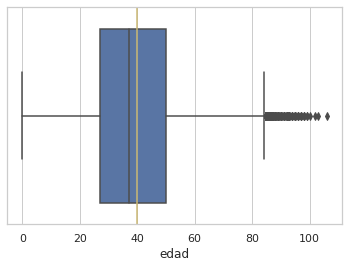

In [29]:
  #Gráfica de boxplot total de pacientes
sns.set(style="whitegrid") #Establecer el estilo de la gráfica
sns.boxplot(x=covid["edad"]) #Generar un boxplot de las edades
plt.axvline(covid["edad"].mean(), c="y"); #Insertar una línea vertical que representa la edad promedio

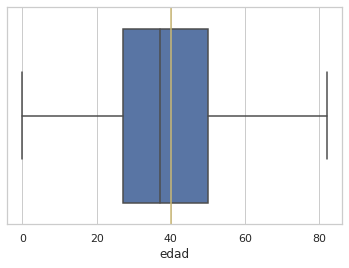

In [30]:
      #Filtrado de bigotes (Score de Rango Intercuartílico)
filtro_inferior = covid["edad"]>per25-(iqr*1.5)
filtro_superior = covid["edad"]<per75+(iqr*1.5)
covid_filtrado = covid[filtro_inferior & filtro_superior] #Se filtran los datos atípicos

sns.boxplot(x=covid_filtrado["edad"]) #Se genera un nuevo boxtplot con los datos atípicos filtrados
plt.axvline(covid["edad"].mean(), c="y"); #Insertar una línea vertical que representa la edad promedio

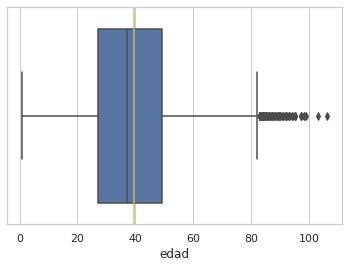

In [31]:
  #Gráfica de boxplot mujeres
sns.set(style="whitegrid") #Establecer el estilo de la gráfica
sns.boxplot(x=covid_f["edad"]) #Generar un boxplot de las edades
plt.axvline(covid_f["edad"].mean(), c="y"); #Insertar una línea vertical que representa la edad promedio

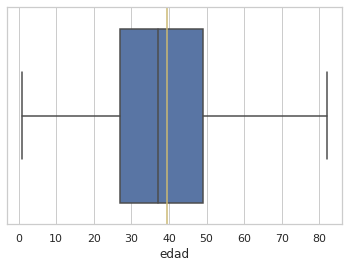

In [32]:
      #Filtrado de bigotes (Score de Rango Intercuartílico)
filtro_inferior = covid_f["edad"]>per25-(iqr*1.5)
filtro_superior = covid_f["edad"]<per75+(iqr*1.5)
covid_filtradof = covid_f[filtro_inferior & filtro_superior] #Se filtran los datos atípicos

sns.boxplot(x=covid_filtradof["edad"]) #Se genera un nuevo boxtplot con los datos atípicos filtrados
plt.axvline(covid_f["edad"].mean(), c="y"); #Insertar una línea vertical que representa la edad promedio

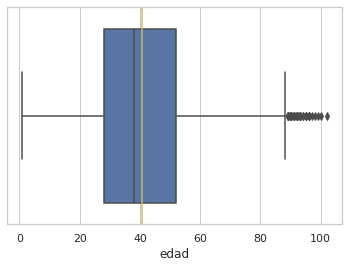

In [33]:
  #Gráfica de boxplot hombres
sns.set(style="whitegrid") #Establecer el estilo de la gráfica
sns.boxplot(x=covid_h["edad"]) #Generar un boxplot de las edades
plt.axvline(covid_h["edad"].mean(), c="y"); #Insertar una línea vertical que representa la edad promedio

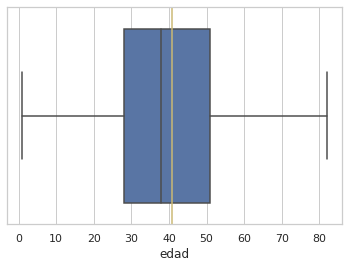

In [34]:
      #Filtrado de bigotes (Score de Rango Intercuartílico)
filtro_inferior = covid_h["edad"]>per25-(iqr*1.5)
filtro_superior = covid_h["edad"]<per75+(iqr*1.5)
covid_filtradoh = covid_h[filtro_inferior & filtro_superior] #Se filtran los datos atípicos

sns.boxplot(x=covid_filtradoh["edad"]) #Se genera un nuevo boxtplot con los datos atípicos filtrados
plt.axvline(covid_h["edad"].mean(), c="y"); #Insertar una línea vertical que representa la edad promedio

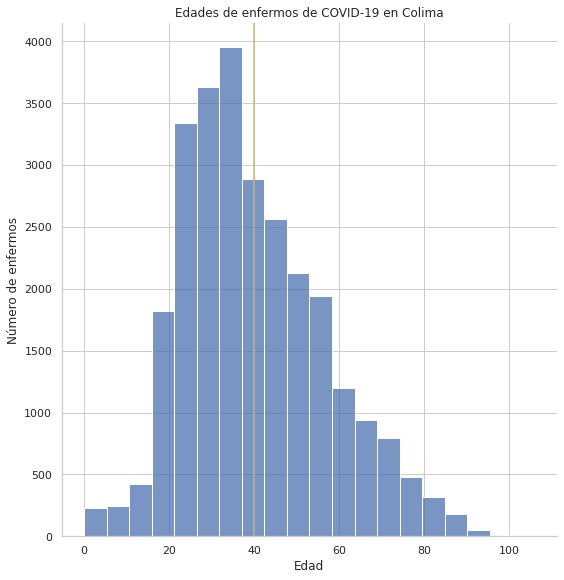

In [35]:
   #Histograma para todos los pacientes
sns.set(style="whitegrid") #Establecer estilo de la gráfica
ax = sns.displot(covid["edad"], kde=False, bins=20, height = 8) #Generar el histograma
ax.set(title ="Edades de enfermos de COVID-19 en Colima", xlabel="Edad", ylabel="Número de enfermos") #Establecer títulos de gráfica y ejes
plt.axvline(covid["edad"].mean(), c="y"); #Insertar una línea vertical que representa la edad promedio

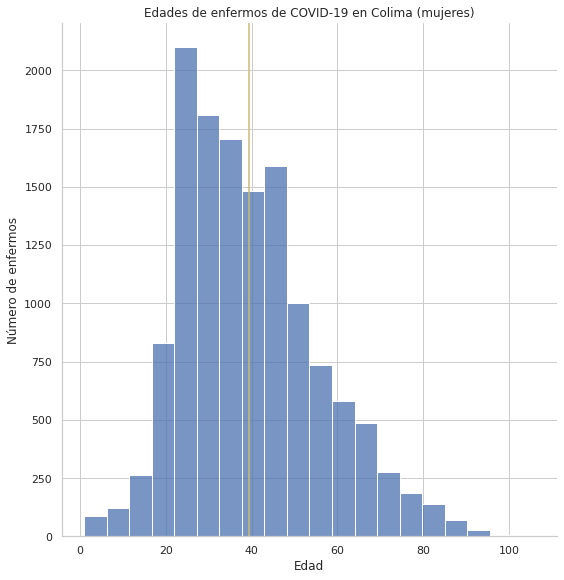

In [36]:
 #Histograma para las pacientes mujeres
sns.set(style="whitegrid") #Establecer estilo de la gráfica
ax = sns.displot(covid_f["edad"], kde=False, bins=20, height = 8) #Generar el histograma
ax.set(title ="Edades de enfermos de COVID-19 en Colima (mujeres)", xlabel="Edad", ylabel="Número de enfermos") #Establecer títulos de gráfica y ejes
plt.axvline(covid_f["edad"].mean(), c="y"); #Insertar una línea vertical que representa la edad promedio

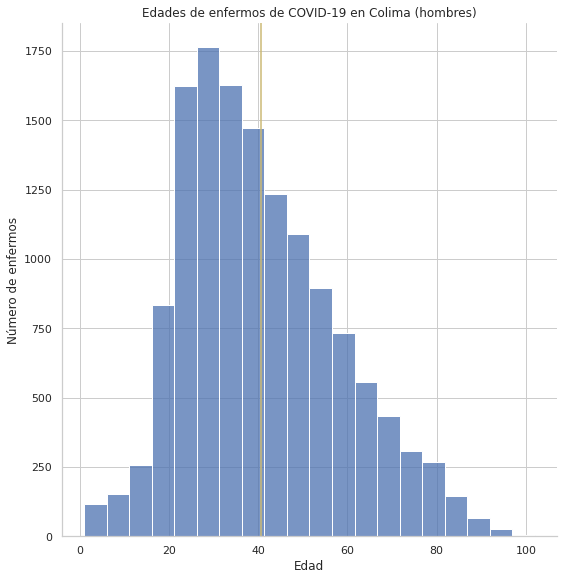

In [37]:
#Histograma para los pacientes hombres
sns.set(style="whitegrid") #Establecer estilo de la gráfica
ax = sns.displot(covid_h["edad"], kde=False, bins=20, height = 8) #Generar el histograma
ax.set(title ="Edades de enfermos de COVID-19 en Colima (hombres)", xlabel="Edad", ylabel="Número de enfermos") #Establecer títulos de gráfica y ejes
plt.axvline(covid_h["edad"].mean(), c="y"); #Insertar una línea vertical que representa la edad promedio

In [38]:
#Análisis de la variable "fecha de inicio de síntomas"
  #Mínimos y máximos
fecha_antigua = covid["inicio_sintomas"].min() #A partir de este punto se vuelve a utilizar el dataframe covid (que cointiene los registros con edades = 0). Esto debido a que el resto de los campos sí tienen valores.
fecha_reciente = covid["inicio_sintomas"].max()
print(f"La fecha más antigua con inicio de síntomas es: {fecha_antigua}")
print(f"La fecha más reciente con inicio de síntomas es: {fecha_reciente}")
print(f"Los casos de COVID-19 en Colima datan desde {fecha_antigua} a {fecha_reciente}")

La fecha más antigua con inicio de síntomas es: 2020-03-12 00:00:00
La fecha más reciente con inicio de síntomas es: 2021-09-06 00:00:00
Los casos de COVID-19 en Colima datan desde 2020-03-12 00:00:00 a 2021-09-06 00:00:00


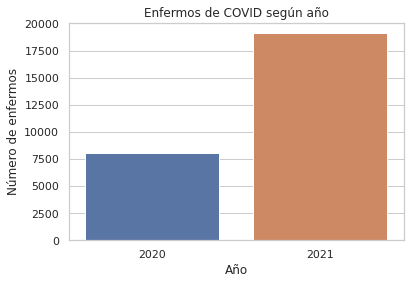

In [39]:
  #Número de casos por año
año_inicio_sintomas = covid["inicio_sintomas"].groupby(covid["inicio_sintomas"].dt.year).count() #Generar una tabla de frecuencias a partir de la agrupación por año
ax=sns.barplot(x=año_inicio_sintomas.index, y=año_inicio_sintomas) #Generar una gráfica de barras a partir de la tabla de frecuencias
ax.set_title("Enfermos de COVID según año") #Establecer el título de la gráfica
ax.set(ylabel="Número de enfermos", xlabel="Año"); #Establecer los títulos de los ejes

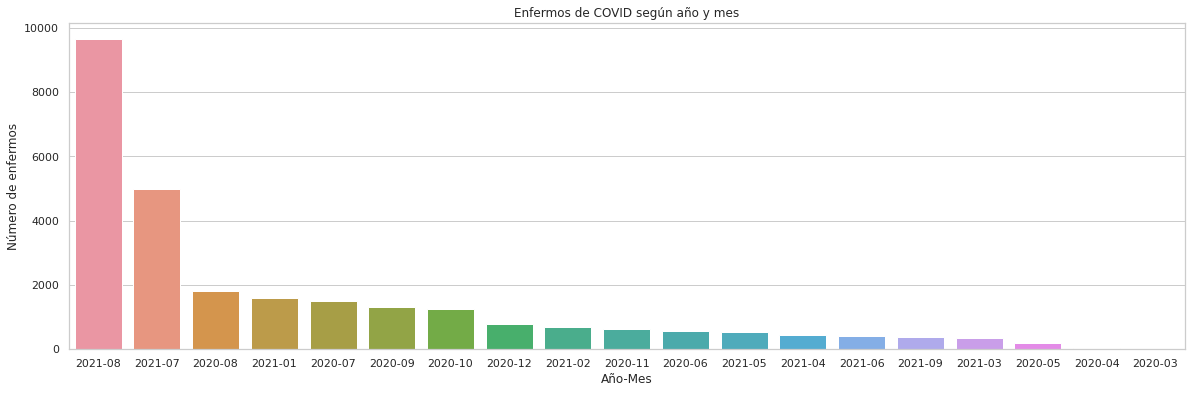

In [40]:
  #Número de casos según mes y año
mes_inicio_sintomas = covid["inicio_sintomas"].dt.to_period("M") #Generar una lista de las fechas considerando el mes y año a partir de la columna de fecha
fmes_inicio_sintomas = mes_inicio_sintomas.value_counts() #Generar una tabla de frecuencias a partir de la agrupación por año-mes
fig_dims = (20, 6) #Establecer las dimensiones de la gráfica (para que se lean las categorías)
fig, ax = plt.subplots(figsize=fig_dims)
ax=sns.barplot(x=fmes_inicio_sintomas.index, y=fmes_inicio_sintomas) #Generar una gráfica de barras a partir de la tabla de frecuencias
ax.set_title("Enfermos de COVID según año y mes") #Establecer el título de la gráfica
ax.set(ylabel="Número de enfermos", xlabel="Año-Mes"); #Establecer los títulos de los ejes

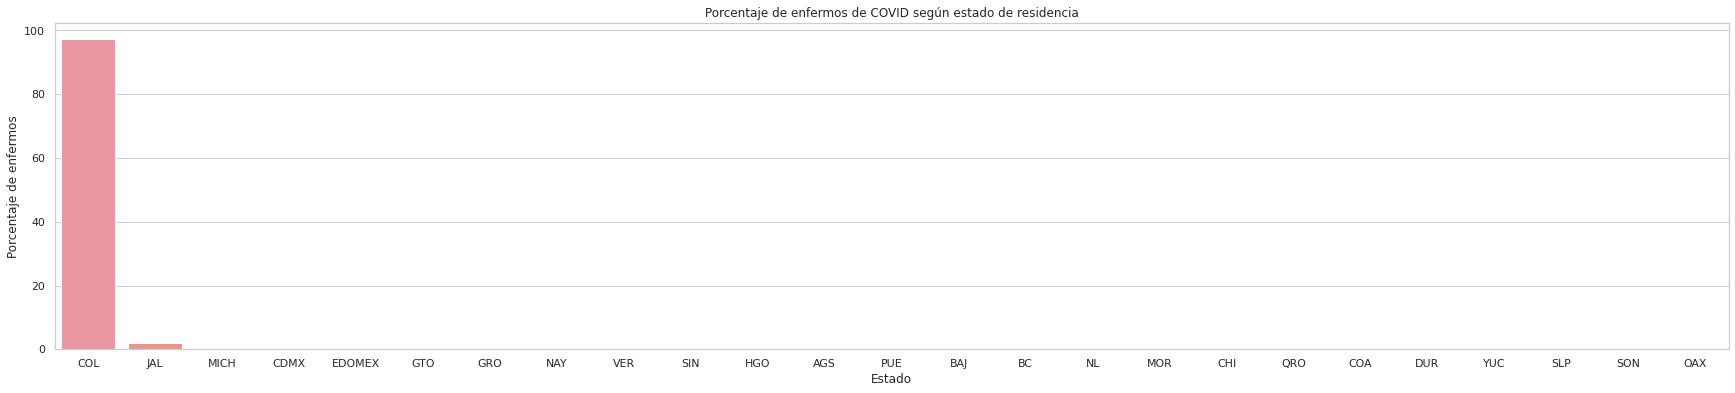

In [41]:
#Análisis de la variable "estado"
t_estado = covid["estado"].value_counts() #Generar tabla de frecuencias de la variable
p_estado = t_estado*100/t_estado.sum() #Generar convertir las frecuencias absolutas en relativas (de número de personas a porcentaje)
fig_dims = (30, 6) #Establecer las dimensiones de la gráfica (para que se lean las categorías)
fig, ax = plt.subplots(figsize=fig_dims)
ax=sns.barplot(x=p_estado.index, y=p_estado) #Generar una gráfica de barras a partir de la tabla de frecuencias
ax.set_title("Porcentaje de enfermos de COVID según estado de residencia") #Establecer el título de la gráfica
ax.set(ylabel="Porcentaje de enfermos", xlabel="Estado"); #Establecer título de los ejes

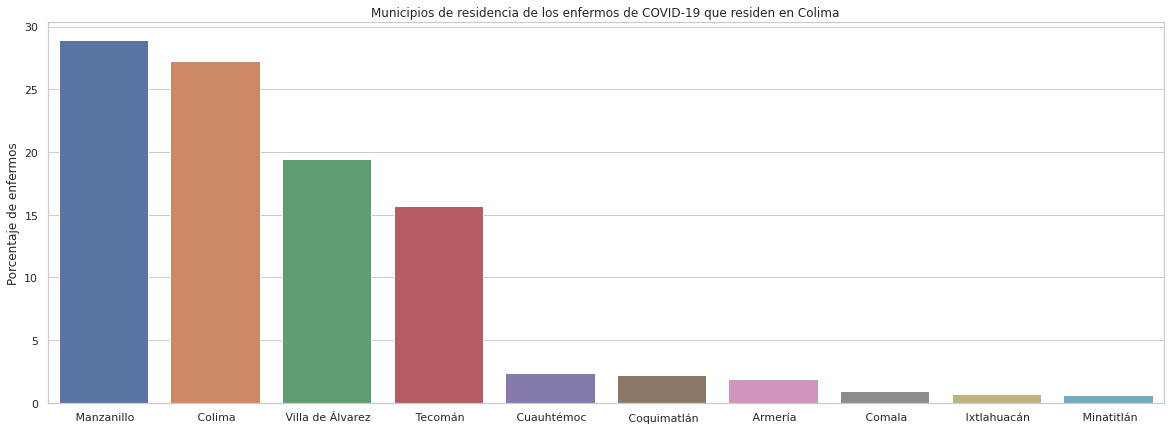

In [42]:
#Análisis de la variable "municipio"
mun_col = covid[covid["estado"].str.startswith("COL")] #Generar un dataframe únicamente con los registros cuyo "estado" sea Colima
t_municipio = mun_col["municipio"].value_counts()
p_municipio = t_municipio*100/t_municipio.sum()
fig_dims = (20, 7) #Establecer las dimensiones de la gráfica (para que se lean las categorías)
fig, ax = plt.subplots(figsize=fig_dims)
ax=sns.barplot(x=p_municipio.index, y=p_municipio)
ax.set_title("Municipios de residencia de los enfermos de COVID-19 que residen en Colima")
ax.set(ylabel="Porcentaje de enfermos");

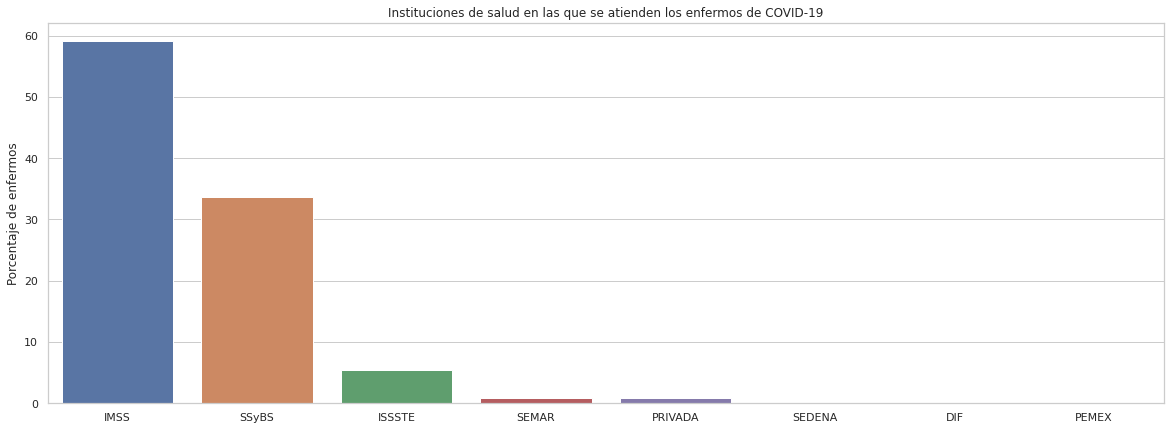

In [43]:
#Análisis de la variable "institucion"
t_institucion = covid["institucion"].value_counts()
p_institucion = t_institucion*100/t_institucion.sum()
fig_dims = (20, 7) #Establecer las dimensiones de la gráfica (para que se lean las categorías)
fig, ax = plt.subplots(figsize=fig_dims)
ax=sns.barplot(x=p_institucion.index, y=p_institucion)
ax.set_title("Instituciones de salud en las que se atienden los enfermos de COVID-19")
ax.set(ylabel="Porcentaje de enfermos");

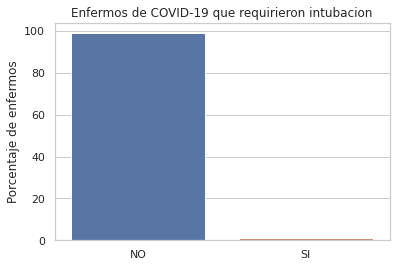

In [44]:
#Análisis de la variable "pacientes_intubacion"
t_intubacion = covid["pacientes_intubacion"].value_counts()
p_intubacion = t_intubacion*100/t_intubacion.sum()
ax=sns.barplot(x=p_intubacion.index, y=p_intubacion)
ax.set_title("Enfermos de COVID-19 que requirieron intubacion")
ax.set(ylabel="Porcentaje de enfermos");

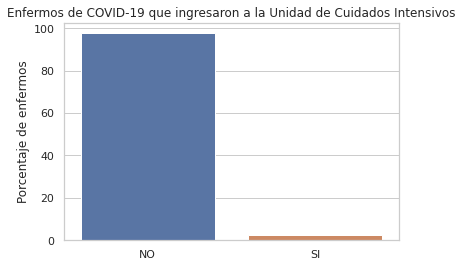

In [45]:
#Análisis de la variable "pacientes_cuidados intensivos"
t_uci = covid["pacientes_uci"].value_counts()
p_uci = t_uci*100/t_uci.sum()
ax=sns.barplot(x=p_uci.index, y=p_uci)
ax.set_title("Enfermos de COVID-19 que ingresaron a la Unidad de Cuidados Intensivos")
ax.set(ylabel="Porcentaje de enfermos");

In [46]:
#Generar variables que representen el porcentaje de enfermos de COVID-19 que presentan cada síntomas
total_positivos = covid["edad"].count() #Variable del total de casos positivos (que se utilizará como denominador de la propoción)
t_fiebre = (covid.fiebre == "SI").sum() #Número de enfermos que presentan la enfermedad
p_fiebre = t_fiebre*100/total_positivos #Porcentaje de enfermos que presentan la enfermedad respecto al total
t_tos = (covid.tos == "SI").sum()
p_tos = t_tos*100/total_positivos
t_odinofagia = (covid.odinofagia == "SI").sum()
p_odinofagia = t_odinofagia*100/total_positivos
t_disnea = (covid.disnea == "SI").sum()
p_disnea = t_disnea*100/total_positivos
t_irritabilidad = (covid.irritabilidad == "SI").sum()
p_irritabilidad = t_irritabilidad*100/total_positivos
t_diarrea = (covid.diarrea == "SI").sum()
p_diarrea = t_diarrea*100/total_positivos
t_dolor_toracico = (covid.dolor_toracico == "SI").sum()
p_dolor_toracico = t_dolor_toracico*100/total_positivos
t_escalofrios = (covid.escalofrios == "SI").sum()
p_escalofrios = t_escalofrios*100/total_positivos
t_cefalea = (covid.cefalea == "SI").sum()
p_cefalea = t_cefalea*100/total_positivos
t_mialgias = (covid.mialgias == "SI").sum()
p_mialgias = t_mialgias*100/total_positivos
t_artralgias = (covid.artralgias == "SI").sum()
p_artralgias = t_artralgias*100/total_positivos
t_ataque_edo_gral = (covid.ataque_edo_gral == "SI").sum()
p_ataque_edo_gral = t_ataque_edo_gral*100/total_positivos
t_rinorrea = (covid.rinorrea == "SI").sum()
p_rinorrea = t_rinorrea*100/total_positivos
t_polipnea = (covid.polipnea == "SI").sum()
p_polipnea = t_polipnea*100/total_positivos
t_vomito = (covid.vomito == "SI").sum()
p_vomito = t_vomito*100/total_positivos
t_dolor_abdominal = (covid.dolor_abdominal == "SI").sum()
p_dolor_abdominal = t_dolor_abdominal*100/total_positivos
t_conjuntivitis = (covid.conjuntivitis == "SI").sum()
p_conjuntivitis = t_conjuntivitis*100/total_positivos
t_cianosis = (covid.cianosis == "SI").sum()
p_cianosis = t_cianosis*100/total_positivos
t_inicio_subito = (covid.inicio_subito == "SI").sum()
p_inicio_subito = t_inicio_subito*100/total_positivos
t_anosmia = (covid.anosmia == "SI").sum()
p_anosmia = t_anosmia*100/total_positivos
t_disgeusia = (covid.disgeusia == "SI").sum()
p_disgeusia = t_disgeusia*100/total_positivos
t_diabetes = (covid.diabetes == "SI").sum()
p_diabetes = t_diabetes*100/total_positivos
t_epoc = (covid.epoc == "SI").sum()
p_epoc = t_epoc*100/total_positivos
t_asma = (covid.asma == "SI").sum()
p_asma = t_asma*100/total_positivos
t_inmunosupresion = (covid.inmunospresion == "SI").sum()
p_inmunosupresion = t_inmunosupresion*100/total_positivos
t_hipertension = (covid.hipertension == "SI").sum()
p_hipertension = t_hipertension*100/total_positivos
t_VIH_SIDA = (covid.VIH_SIDA == "SI").sum()
p_VIH_SIDA = t_VIH_SIDA*100/total_positivos
t_otra = (covid.otra == "SI").sum()
p_otra = t_otra*100/total_positivos
t_enfermedad_cardiaca = (covid.enfermedad_cardiaca == "SI").sum()
p_enfermedad_cardiaca = t_enfermedad_cardiaca*100/total_positivos
t_obesidad = (covid.obesidad == "SI").sum()
p_obesidad = t_obesidad*100/total_positivos
t_insuficiencia_renal = (covid.insuficiencia_renal == "SI").sum()
p_insuficiencia_renal = t_insuficiencia_renal*100/total_positivos
t_tabaquismo = (covid.tabaquismo == "SI").sum()
p_tabaquismo = t_tabaquismo*100/total_positivos

In [47]:
#Creación de un data frame con los porcentajes de cada enfermedad
diccionario_enfermedades = {
    "fiebre" : p_fiebre,
    "tos" : p_tos,
    "odinofagia" : p_odinofagia,
    "disnea" : p_disnea,
    "irritabilidad": p_irritabilidad,
    "diarrea" : p_diarrea,
    "dolor_toracico" : p_dolor_toracico,
    "escalofrios" : p_escalofrios,
    "cefalea" : p_cefalea,
    "mialgias" : p_mialgias,
    "artralgias" : p_artralgias,
    "ataque_edo_gral" : p_ataque_edo_gral,
    "rinorrea" : p_rinorrea,
    "polipnea" : p_polipnea,
    "vomito" : p_vomito,
    "dolor_abdominal" : p_dolor_abdominal,
    "conjuntivitis" : p_conjuntivitis,
    "cianosis" : p_cianosis,
    "inicio_subito" : p_inicio_subito,
    "anosmia" : p_anosmia,
    "disgeusia" : p_disgeusia,
    "diabetes" : p_diabetes,
    "EPOC" : p_epoc,
    "asma" : p_asma,
    "inmunosupresion" : p_inmunosupresion,
    "hipertension" : p_hipertension,
    "VIH-SIDA" : p_VIH_SIDA,
    "otra" : p_otra,
    "enfermedad_cardiaca" : p_enfermedad_cardiaca,
    "obesidad" : p_obesidad,
    "insuficiencia_renal" : p_insuficiencia_renal,
    "tabaquismo" : p_tabaquismo
}


In [48]:
#Creación de un dataframe a partir del diccionario con la proporción de enfermos que presenta cada enfermedad
enfermedades = pd.DataFrame.from_dict(diccionario_enfermedades, orient='index')
enfermedades

,0
fiebre,74.402416
tos,79.547715
odinofagia,57.857906
disnea,17.465287
irritabilidad,27.045044
diarrea,18.713860
dolor_toracico,20.172369
escalofrios,40.797761
cefalea,82.442636
mialgias,68.572060


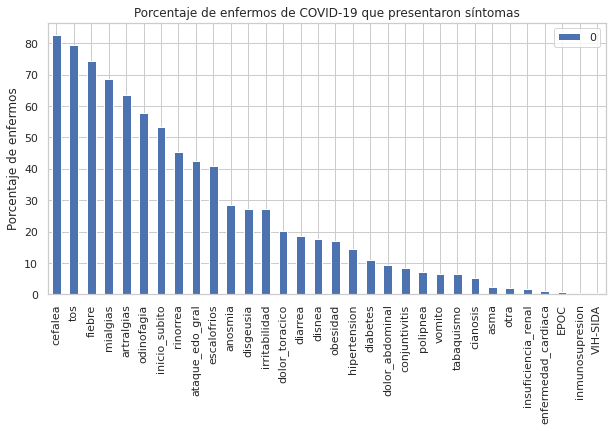

In [49]:
#Creación de una gráfica de barras que muestra los síntomas/enfermedades más comunes en los enfermos de COVID-19
ax = enfermedades.sort_values(by=0, ascending=False).plot(kind="bar", figsize=(10,5))
ax.set_title("Porcentaje de enfermos de COVID-19 que presentaron síntomas")
ax.set(ylabel="Porcentaje de enfermos");

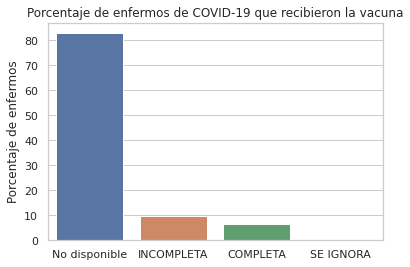

In [50]:
#Análisis de la variable "vacuna_covid"
t_vacuna = covid["vacuna_covid"].value_counts()
p_vacuna = t_vacuna*100/t_vacuna.sum()
ax=sns.barplot(x=p_vacuna.index, y=p_vacuna)
ax.set_title("Porcentaje de enfermos de COVID-19 que recibieron la vacuna")
ax.set(ylabel="Porcentaje de enfermos");

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


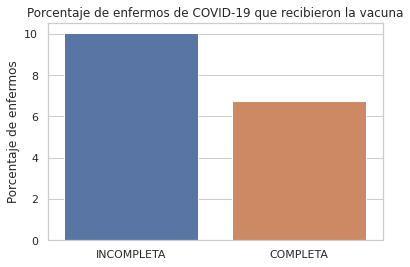

In [51]:
#Filtrar filas con datos inexistentes
covid_vacuna = covid[(covid["vacuna_covid"] != "No disponible")] #Genera un dataframe filtrando las filas que tienen "no disponible" en el campo "vacuna_covid"
covid_vacuna = covid_vacuna[(covid["vacuna_covid"] != "SE IGNORA")] #Genera un dataframe filtrando las filas que tienen "se ignora" en el campo "vacuna_covid"
t_vacuna1 = covid_vacuna["vacuna_covid"].value_counts()
p_vacuna1 = t_vacuna1*100/26822
ax=sns.barplot(x=p_vacuna1.index, y=p_vacuna1)
ax.set_title("Porcentaje de enfermos de COVID-19 que recibieron la vacuna")
ax.set(ylabel="Porcentaje de enfermos");

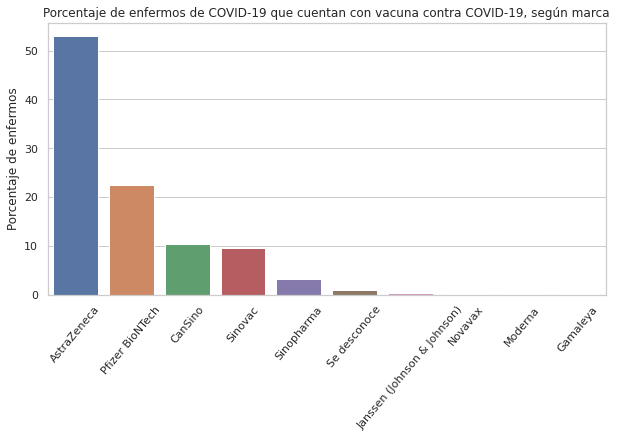

In [52]:
#Filtrar filas con datos inexistentes
marca_vacuna = covid[covid["vacuna_covid"].str.contains("COMPLETA")] #Genera un dataframe dejando las filas que tienen "completa" o "incompleta" en el campo "vacuna_covid"
t_marcav = marca_vacuna["marca_vacuna"].value_counts()
p_marcav = t_marcav*100/t_marcav.sum()
fig_dims = (10, 5) #Establecer las dimensiones de la gráfica (para que se lean las categorías)
fig, ax = plt.subplots(figsize=fig_dims)
ax=sns.barplot(x=p_marcav.index, y=p_marcav)
ax.set_title("Porcentaje de enfermos de COVID-19 que cuentan con vacuna contra COVID-19, según marca")
ax.set(ylabel="Porcentaje de enfermos")
ax.set_xticklabels(ax.get_xticklabels(), rotation=50);

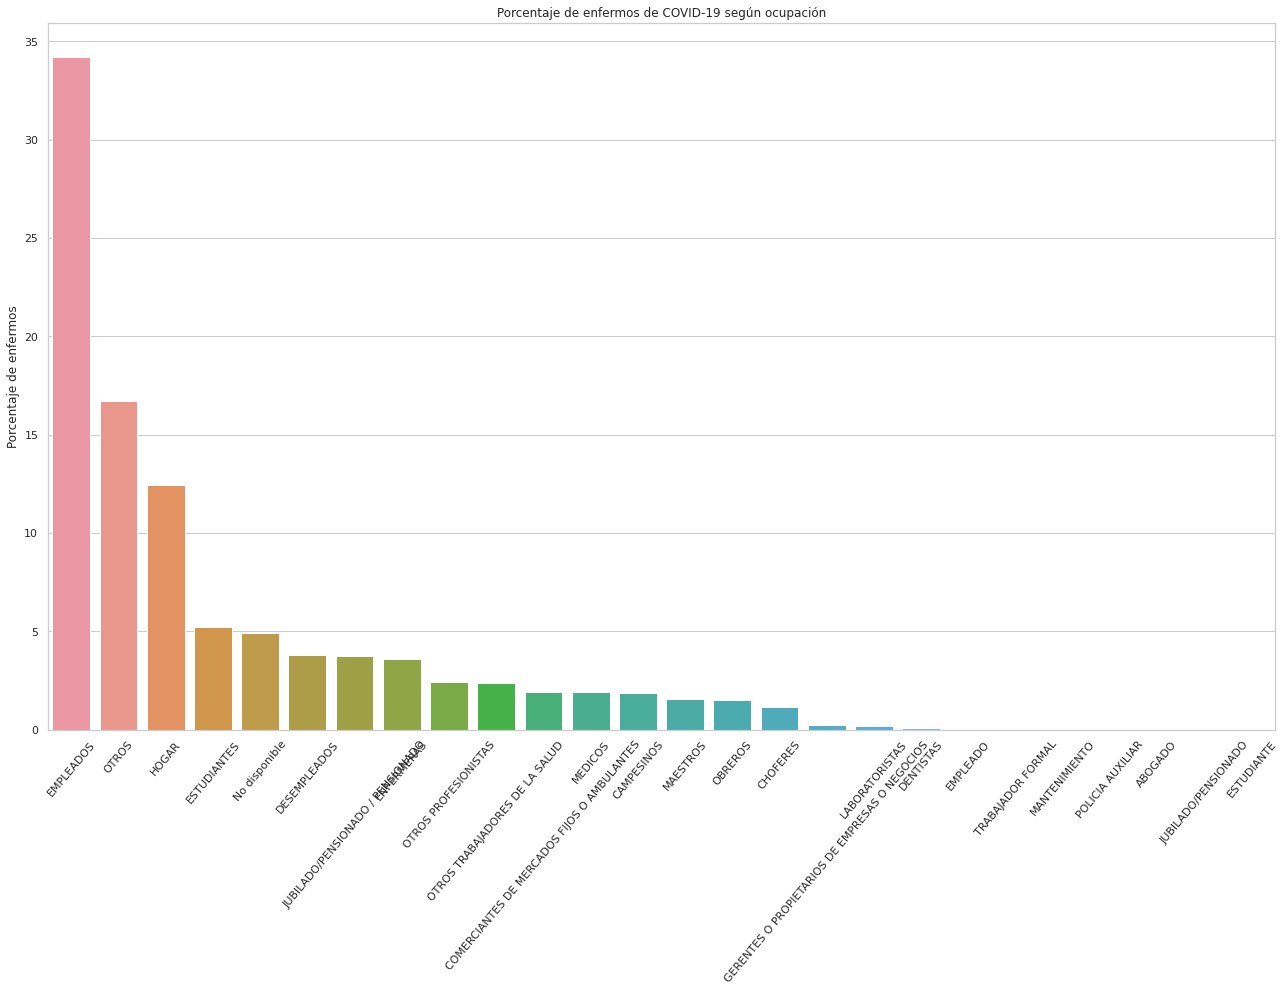

In [53]:
#Análisis de la variable "ocupacion"
t_ocupacion = covid["ocupacion"].value_counts()
p_ocupacion = t_ocupacion*100/total_positivos
fig_dims = (22, 13) #Establecer las dimensiones de la gráfica (para que se lean las categorías)
fig, ax = plt.subplots(figsize=fig_dims)
ax=sns.barplot(x=p_ocupacion.index, y=p_ocupacion)
ax.set_title("Porcentaje de enfermos de COVID-19 según ocupación")
ax.set(ylabel="Porcentaje de enfermos")
ax.set_xticklabels(ax.get_xticklabels(), rotation=50);

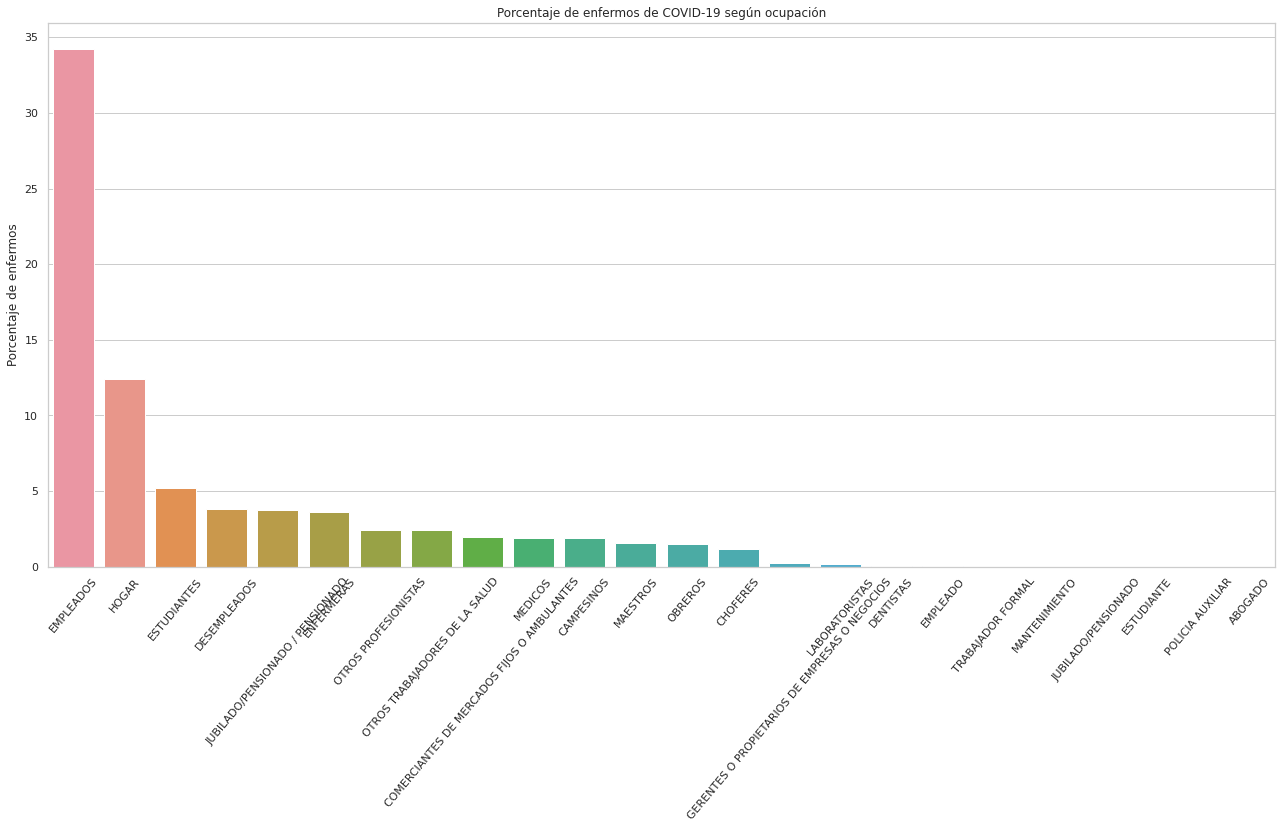

In [54]:
#Análisis de la variable "ocupacion"
covid_ocupa = covid[(covid["ocupacion"] != "No disponible")] #Se filtra el dataframe para que se eliminen las filas con respuesta "No disponible" en el campo "ocupacion"
covid_ocupa = covid_ocupa[(covid_ocupa["ocupacion"] != "OTROS")] #Se filtra el dataframe para que se eliminen las filas con respuesta "OTROS" en el campo "ocupacion"
t_ocupacion1 = covid_ocupa["ocupacion"].value_counts()
p_ocupacion1 = t_ocupacion1*100/total_positivos
fig_dims = (22, 10) #Establecer las dimensiones de la gráfica (para que se lean las categorías)
fig, ax = plt.subplots(figsize=fig_dims)
ax=sns.barplot(x=p_ocupacion1.index, y=p_ocupacion1)
ax.set_title("Porcentaje de enfermos de COVID-19 según ocupación")
ax.set(ylabel="Porcentaje de enfermos")
ax.set_xticklabels(ax.get_xticklabels(), rotation=50);

In [55]:
#Tabla de contingencia enfermos por municipio y sexo
covid_crosstab1 = pd.crosstab(mun_col["municipio"], [mun_col["sexo"]], margins=True, margins_name="Total")
pd.set_option('display.max_rows', None)
covid_crosstab1

sexo,F,M,Total
municipio,,,
Armería,255,252,507
Colima,3625,3574,7199
Comala,124,124,248
Coquimatlán,288,303,591
Cuauhtémoc,330,300,630
Ixtlahuacán,80,103,183
Manzanillo,3674,3969,7643
Minatitlán,74,88,162
Tecomán,2141,2004,4145


In [56]:
#Tablas de contingencia enfermos por municipio, sexo e institución
covid_crosstab2 = pd.crosstab(mun_col["municipio"], [mun_col["sexo"], mun_col["institucion"]], margins=True, margins_name="Total")
pd.set_option('display.max_rows', None)
covid_crosstab2

sexo                F                       ...      M              Total
institucion       DIF  IMSS ISSSTE PRIVADA  ... SEDENA SEMAR SSyBS       
municipio                                   ...                          
 Armería            0   137      3       0  ...      0     1   120    507
 Colima             5  2118    284      27  ...      6     1  1278   7199
 Comala             0    55      8       3  ...      0     0    50    248
 Coquimatlán        0   121     21       2  ...      1     0   158    591
 Cuauhtémoc         0   203     20       5  ...      0     0    75    630
 Ixtlahuacán        0     7     15       0  ...      0     0    69    183
 Manzanillo         0  2254    129       2  ...      3   144  1152   7643
 Minatitlán         0    54      1       2  ...      0     0    19    162
 Tecomán            0  1135     35       4  ...      3     0   825   4145
 Villa de Álvarez   5  1651    269      17  ...      3     2   563   5143
Total              10  7735    785      62  ...     16   148  4309  26451

[11 rows x 16 columns]

In [58]:
#Tabla de contingencia enfermos por municipio, sexo y esquema de vacuna
vac_col = marca_vacuna[marca_vacuna["estado"].str.startswith("COL")] #Generar un dataframe únicamente con los registros cuyo "estado" sea Colima
covid_crosstab3 = pd.crosstab(vac_col["municipio"], [vac_col["sexo"], vac_col["vacuna_covid"]], margins=True, margins_name="Total")
pd.set_option('display.max_rows', None)
covid_crosstab3

sexo                     F                   M            Total
vacuna_covid      COMPLETA INCOMPLETA COMPLETA INCOMPLETA      
municipio                                                      
 Armería                17         16       14         23    70
 Colima                373        467      268        394  1502
 Comala                 18         12        7          4    41
 Coquimatlán            50         33       34         42   159
 Cuauhtémoc             23         18       17         15    73
 Ixtlahuacán             4          5        5          6    20
 Manzanillo            161        322      130        341   954
 Minatitlán              0          1        2          1     4
 Tecomán               113        214       89        227   643
 Villa de Álvarez      268        276      167        243   954
Total                 1027       1364      733       1296  4420

#5. Conclusiones

Al corte del 06 de septiembre de 2021 en el estado de Colima se registran 57,729 posibles casos de COVID-19. De este total el 47% restante es positivo.

En promedio, un enfermo de COVID-19 tiene 40 años; el menor tiene 1 año y el mayor 106 años. La misma edad promedio se observa tanto para hombres como para mujeres.

Tanto la población en general como los grupos de enfermos de COVID-19 que son mujeres y hombres observan una distribución similar respecto a su edad. De acuerdo a los histogramas observados, las edades del total de enfermos y el grupo de hombres enfermos se distribuyen ligeramente sesgados hacia la izquiereda (lo que indica que la mayoría de los enfermos son más jovenes que el promedio); por otro lado, la distribución de las edades para las mujeres se encuentra normalmente distribuida, es decir, que la mayoría de las enfermos tienen una edad cercana al promedio.

El 75% de los enfermos de COVID-19 en Colima tiene 50 años o menos; el 75% de las mujeres enfermas tiene 49 años o menos y el mismo porcentaje de hombres enfermos tiene 52 años o menos.

En general, el 50% de los enfermos tiene entre 28 y 50 años. El 50% de las mujeres enfermas de COVID-19 tiene entre 27 y 49 años, mientras que el mismo porcentaje de hombres va de los 28 a los 52 años.

EL 70% de los casos positivos de COVID-19 se registraron en el año 2021, siendo agosto y julio los meses que registraron mayor número de enfermos. Este hallazgo es interesante puesto que para dichas fechas en Colima ya se había concluido la primera etapa de vacunación para mayores de 18 años y se comenzó la segunda etapa de vacunación para grupos de mayor edad (40 años y más).

El 97% de los enfermos son casos que residen en el estado de Colima y un 2% son de personas residentes en el estado de Jalisco. En un porcentaje inferior al 1% se registran casos de residentes de otras 23 entidades del país; sin embargo, los estados colindantes de Colima: Jalisco y Michoacán son los que presentan la mayoría de los casos.

Del total de enfermos COVID-19 que residen en Colima, el 92% se concentran en cuatro municipios: Manzanillo, Colima, Tecomán y Villa de Álvarez (los municipios más poblados del estado). El 50% del total de enfermos residen en los municipios: Manzanillo y Colima (los que tienen mayor actividad económica).

Cerca del 60% de los enfermos de COVID-19 son atendidos en el IMSS, mientras que el 30% reciben atención médica en los centros de salud de la Secretaría de Salud y Bienestar Social del Gobierno del Estado. Instituciones de salud como el ISSSTE, SEMAR, PEMEX, DEFENSA y privadas atienden a un porcentaje inferior al 1% de los enfermos de COVID-19 en Colima.

Solamente el 1% de los enfermos de COVID-19 en Colima son intubados y el 2% han sido atendidos en Unidad de Cuidados Intensivos.

El síntoma que se presenta principalmente en los enfermos es cefaléa seguido por tos, fiebre, mialgias (dolor muscular) y artralgias (dolor en articulaciones). 

Solamente el 17% de los enfermos de COVID-19 registrados en Colima tiene por lo menos una dosis de vacuna contra la enfermedad: el 10% esquema de vacunación incompleto y el 7% completo.

Del total de enfermos que tienen por lo menos una dosis, el 53% son de la vacuna marca AstraZeneca y el 22% marca Pfizer.

La principal ocupación económica de los enfermos de COVID-19 son empleados (34%), seguido por trabajadoras del hogar y estudiantes. Como un segundo grupo se encuentran los desempleados y jubilados/pensionados, y como tercer grupo los trabajadores de la salud (enfermeras y médicos).

Para los municipios con mayor población de enfermos de COVID-19 (Manzanillo y Colima) son más las mujeres que los hombres enfermos, mientras que para los municipios menos poblados (Ixtlahuacán, Coquimatlán y Minatitlán) son más los hombres enfermos que las mujeres.

Los municipios Colima y Villa de Álvarez son los que concentran el mayor número de enfermos atendidos en instituciones de salud privadas; Manzanillo, siendo el municipio con mayor número de casos registra un porcentaje menor.

Del total de enfermos COVID-19 que residen en Manzanillo, Colima, Tecomán y Villa de Álvarez y que tienen al menos una dosis de vacunación, la mayoría son incompletos. 

#6. Recomendaciones

Por un lado, se sugiere diseñar e implementar un mecanismo de reducción de contagios dirigido principalmente a los residentes de los municipios Manzanillo y Colima, poniendo especial énfasis en las personas empleadas de 28 a 50 años, particularmente a aquellas dedidadas a trabajos en el hogar.

Además, implementar mecanismos de prevenciión del contagio para los visitantes de otras entidades, principalmente, Jalisco y Michoacán.

Por otro lado, se sugiere incrementar el porcentaje de colimenses que han recibido por lo menos 1 dosis de vacuna, con el objetivo de contar con mayor número de esquemas completos de vacunación.

Respecto a la atención en instituciones de salud pudiera observarse la capacidad de atención de ISSSTE, SEMAR, DEFENSA y PEMEX o lograr convenios de colaboración con instituciones privadas para ampliar la atención a los enfermos en el estado.

